## BIBLIOTEKI

In [1]:
import kagglehub
from pathlib import Path, PurePath
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import chi2_contingency

In [2]:
pd.set_option('future.no_silent_downcasting', True)

## WPROWADZENIE I ZAŁADOWANIE DANYCH

W niniejszym projekcie przeprowadzona zostanie eksploracyjna analiza danych (EDA) oparta na zbiorze „Tourism Page Engagement” z platformy Kaggle (link: https://www.kaggle.com/datasets/ddosad/customer-behaviour-tourism-portal/data). Zawiera on informacje na temat zachowań użytkowników na stronie internetowej firmy turystycznej — obejmuje dane dotyczące interakcji z treściami, preferencji podróżniczych, cech demograficznych oraz aktywności na platformie.

Celem analizy eksploracyjnej (EDA) jest lepsze zrozumienie wzorców zachowań użytkowników oraz czynników, które mogą wpływać na ich decyzję o zakupie biletu w najbliższym miesiącu.

Zidentyfikowane pytania badawcze:
 - Czy istnieje związek między poziomem zaangażowania użytkownika na stronie firmy a prawdopodobieństwem zakupu biletu w najbliższym miesiącu?
 - Które formy aktywności użytkownika (np. komentarze, lajki, czas spędzony na stronie) są najsilniej powiązane z zakupem biletu?
 - Czy liczba członków rodziny dodanych do profilu wpływa na prawdopodobieństwo zakupu biletu?
 - Jakie urządzenia i preferencje podróżnicze dominują wśród użytkowników?
 - Czy istnieje istotna zależność między wskaźnikami społecznymi (np. liczba polubień, ocena sieci znajomych) a decyzją o zakupie biletu?
 - Które cechy użytkowników i ich zachowania na stronie najczęściej wiążą się z decyzją o zakupie biletu?
 - Czy użytkownicy pracujący różnią się od niepracujących pod względem zaangażowania lub skłonności do zakupu biletu?


In [5]:
df = pd.read_csv("Customer behaviour Tourism.csv")
print(f"Zbiór danych zawiera {df.shape[0]} wierszy oraz {df.shape[1]} kolumn.")

Zbiór danych zawiera 11760 wierszy oraz 17 kolumn.


In [7]:
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [9]:
print("Poniżej przedstawiono typy danych poszczególnych zmiennych w zbiorze danych:")
print(df.info())

num_cols = df.select_dtypes(include='number').shape[1]
cat_cols = df.select_dtypes(include='object').shape[1]

print(f"\nZbiór danych zawiera {num_cols} zmiennych numerycznych oraz {cat_cols} zmiennych kategorycznych.")

Poniżej przedstawiono typy danych poszczególnych zmiennych w zbiorze danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-nul

Poniższe tabele zawierają opis zmiennych zawartych w zbiorze:

Zmienna celu (target):

| Zmienna       | Opis                                                        |
|---------------|-------------------------------------------------------------|
| Taken_product | Czy użytkownik kupi bilet w przyszłym miesiącu              | 

Identyfikatory i dane demograficzne:

| Zmienna            | Opis                                                              |
|--------------------|-------------------------------------------------------------------|
| UserID             | Unikalny identyfikator użytkownika                                |
| Adult_flag         | Czy użytkownik jest dorosły (0/1)                                 |
| working_flag       | Czy użytkownik pracuje (Yes/No)                                   |
| member_in_family   | Liczba członków rodziny dodanych do konta                         |

Aktywność i zaangażowanie użytkownika:

| Zmienna                                         | Opis                                                                |
|-------------------------------------------------|---------------------------------------------------------------------|
| Yearly_avg_view_on_travel_page                  | Średnia roczna liczba odsłon stron podróżniczych                    |
| Yearly_avg_comment_on_travel_page               | Średnia roczna liczba komentarzy na stronach podróżniczych          |
| montly_avg_comment_on_company_page              | Średnia liczba komentarzy miesięcznie na stronie firmy              |
| Daily_Avg_mins_spend_on_traveling_page          | Średni dzienny czas spędzony na stronie podróżniczej firmy          |
| following_company_pag                           | Czy użytkownik śledzi stronę firmy (Yes/No)                         |
| preferred_device                                | Preferowane urządzenie logowania                                    |

Aktywność podróżnicza:

| Zmienna                                         | Opis                                                               |
|-------------------------------------------------|--------------------------------------------------------------------|
| yearly_avg_Outstation_checkins                  | Średnia liczba zameldowań poza miastem rocznie                     |
| total_likes_on_outstation_checkin_given         | Liczba polubień nadanych innym na zameldowania poza miastem        |
| total_likes_on_outofstation_checkin_received    | Liczba polubień otrzymanych na zameldowania poza miastem           |
| week_since_last_outstation_checkin              | Liczba tygodni od ostatniego zameldowania poza miastem             |
| travelling_network_rating                       | Ocena sieci znajomych podróżników (1 = wysoka, 4 = niska)          |
| preferred_location_type                         | Preferowany typ lokalizacji podróży (np. Medyczna, Finansowa)      |

W kolejnych krokach przeprowadzona zostanie szczegółowa diagnostyka danych: sprawdzenie braków, duplikatów, rozkładów zmiennych oraz obserwacji odstających.

## CZYSZCZENIE I PORZĄDKOWANIE DANYCH

#### Czyszczenie zbioru daych

Oczyszczenie danych rozpoczęto od kolumn kategorycznych, w których zidentyfikowano unikalne wartości w każdej kolumnie. Tam gdzie będzie to wymagane, dane zostaną "naprawione".

Kolumny kategoryczne: 
Wiele wartości liczbowych wydaje się być oznaczonych jako typ "Object" — zostanie przeanalizowana ich zawartość.

In [12]:
cat_columns= df.select_dtypes(include='object').columns

for col in cat_columns:
    print(f"Wartości w kolumnie '{col}':")
    print(df[col].unique())
    print()

Wartości w kolumnie 'Taken_product':
['Yes' 'No']

Wartości w kolumnie 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Wartości w kolumnie 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Wartości w kolumnie 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Wartości w kolumnie 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Wartości w kolumnie 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Wartości w kolumnie 'working_flag':
['No' 'Yes' '0']



W różnych kolumnach występują nieoczekiwane wartości - nie tylko wartości nan (braki danych). Zaobserwowano że:
 - w kolumnie "preferred_device" znajdują się różne wersje tych samych wartości, np. 'ANDROID' i 'Android', 'Other' i 'Others',
 - w kolumnie "yearly_avg_Outstation_checkins" występuje znak '*',
 - w kolumnie "member_in_family" występuje wartość 'Three' zamiast '3',
 - w kolumnie "following_company_page" pojawia się 'Yeso', 'Yes, 'No', a także wartości '1', '0',
 - w kolumnie working_flag występuje wartość '0' razem zamiast 'No'.

Dla zmiennej "preffered_device" zdecydowano się na takie ujednolicenie wartości:
| Wartość w kolumnie | Znaczenie | Proponowana wartość |
|-----------|-----------|-----------|
| Android/Android OS/ANDROID/ | Użytkownik loguje się przez telefon/tablet z Androidem | Mobile |
| iOS | Użytkownik loguje się przez iPhone lub iPad | Mobile |
| iOS and Android | Użytkownik loguje się przez telefon/tablet z Androidem lub przez iPhone lub iPad | Mobile |
| Mobile | Ogólne określenie urządzenia mobilnego (bez wskazania systemu) | Mobile |
| Laptop | Logowanie z laptopa | Laptop |
| Tab | Tablet (może być Androidowy lub Apple) | Mobile |
| Other/Others | Inne urządzenia | Other |

In [16]:
device_map= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Others' : 'Other',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_map)

print("Wartości po przekształceniu:")
print(df['preferred_device'].unique())

Wartości po przekształceniu:
['Mobile' nan 'Other' 'Laptop']


Znak '*' w kolumnie "yearly_avg_Outstation_checkins" zamieniono na wartość NaN (czyli brak danych). Ponadto wartości tej zmiennej zostaną zmienione na liczby całkowite (integer - jeżeli w kolumnie są wartości Nan, to zmienna będzie float). Jeżeli jakiejś wartości nie da się przekonwertować na liczbę, zostaie ona zastąpiona przez Nan (parametr errors='coerce').

In [19]:
df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')

print("Wartości po przekształceniu:")
print(np.sort(df['yearly_avg_Outstation_checkins'].unique()))

Wartości po przekształceniu:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. nan]


Słowny zapis wartości 3 w kolumnie "member_in_family" zamieniono na wartość numeryczną. Zmienną przekonwertowano na zmienną numeryczną.

In [22]:
df['member_in_family']= df['member_in_family'].replace('Three',3)
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce')

print("Wartości po przekształceniu:")
print(np.sort(df['member_in_family'].unique()))

Wartości po przekształceniu:
[ 1  2  3  4  5 10]


Postanowiono, że zmienna "following_company_page" będzie zmienną kategoryczną - aby później było łatwiej zrozumieć proporcje, wyniki. Wartości 'Yeso' i 'Yes' zmieniono na '1', a wartość 'No' na '0'.

In [25]:
page_map= {'Yes': '1', 
           'Yeso' : '1', 
           'No' : '0'}
df['following_company_page'] = df['following_company_page'].replace(page_map)

print("Wartości po przekształceniu:")
print(df['following_company_page'].unique())

Wartości po przekształceniu:
['1' '0' nan]


Zmienna "working_flag" powinna przyjmować wartości 'Yes', 'No', więc zmieniono '0' na 'No'.

In [28]:
df['working_flag']= df['working_flag'].replace('0','No')

print("Wartości po przekształceniu:")
print(df['working_flag'].unique())

Wartości po przekształceniu:
['No' 'Yes']


Przyjrzano się dokładniej zmiennej "Adult_flag". Zmienna ta określa czy użytkownik jest osobą pełnoletnią (1) czy nie (0) - powinna zawierać tylko te wartości. Z tego względu wszystkie wartości powyżej 1 zamieniono na 1.

In [31]:
print("Wartości w kolumnie Adult_flag:", sorted(df['Adult_flag'].unique()))

df['Adult_flag'] = df['Adult_flag'].apply(lambda x: 1 if x > 1 else x)

print("\nWartości po przekształceniu:")
print(df['Adult_flag'].unique())

Wartości w kolumnie Adult_flag: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(nan)]

Wartości po przekształceniu:
[ 0.  1. nan]


Dla zmiennych numerycznych zweryfikowano również, czy niezawierają one wartości ujemnych - ze względu na specyfikę zbioru/danych, wartości ujemne nie powinny występować.

In [34]:
num_columns = df.select_dtypes(exclude=['object'])

cols_with_neg = [col for col in num_columns.columns if (df[col] < 0).any()]

if cols_with_neg:
    print("Kolumny z ujemnymi wartościami:", cols_with_neg)
else:
    print("Nie ma kolumn z wartościami ujemnymi.")

Nie ma kolumn z wartościami ujemnymi.


#### Braki danych

W celu ujednolicenia zapisu braków danych, w przypadku gdyby braki były zaisane jako łańcuch znaków 'nan' zamieniono je na wartość NumPy np.nan.

In [38]:
df = df.replace('nan', np.nan)

W pierwszej kolejności zidentyfikowano kolumny, które zawierają brakujące wartości (`NaN`), a następnie dla każdej z obliczono i wyświelono liczbę brakujących wartości i procent braków względem całkowitej liczby wierszy w DataFrame.

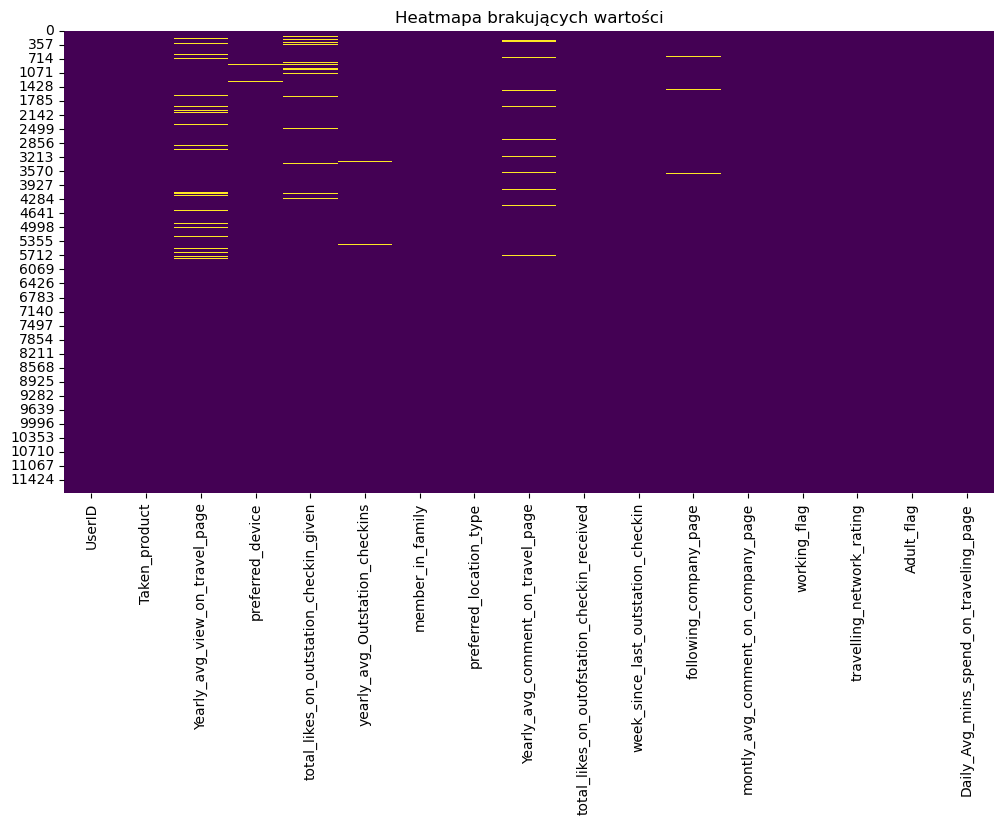

In [41]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmapa brakujących wartości')
plt.show()

In [43]:
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Zmienna {column} ma {missing_count} wartości brakujących, co stanowi {missing_percentage:.2f}% całej kolumny.")

Zmienna Yearly_avg_view_on_travel_page ma 581 wartości brakujących, co stanowi 4.94% całej kolumny.
Zmienna preferred_device ma 53 wartości brakujących, co stanowi 0.45% całej kolumny.
Zmienna total_likes_on_outstation_checkin_given ma 381 wartości brakujących, co stanowi 3.24% całej kolumny.
Zmienna yearly_avg_Outstation_checkins ma 76 wartości brakujących, co stanowi 0.65% całej kolumny.
Zmienna preferred_location_type ma 31 wartości brakujących, co stanowi 0.26% całej kolumny.
Zmienna Yearly_avg_comment_on_travel_page ma 206 wartości brakujących, co stanowi 1.75% całej kolumny.
Zmienna following_company_page ma 103 wartości brakujących, co stanowi 0.88% całej kolumny.
Zmienna Adult_flag ma 1 wartości brakujących, co stanowi 0.01% całej kolumny.
Zmienna Daily_Avg_mins_spend_on_traveling_page ma 1 wartości brakujących, co stanowi 0.01% całej kolumny.


Dane zawierają braki, przy czym większość kolumn ma mniej niż 1% braków, co nie powinno znacząco wpływać na jakość analizy. Wyjątkiem jest kolumna "Yearly_avg_view_on_travel_page", która ma niemal 5% brakujących wartości — warto przyjrzeć się jej bliżej i rozważyć imputację lub ewentualne wykluczenie jej z analizy, jeśli nie da się wiarygodnie uzupełnić danych. 

Ustalono, że braki w zmiennych kategorycznych zostaną uzupełnione najczęściej występującą wartością, natomiast braki w zmiennych numerycznych uzupełnione zostną medianą.

Jako, że zmienne "travelling_network_rating" i "Adult_flag" obecnie są zmiennymi numerycznymi, zostały zmienione na zmienne kategoryczne - będą imputowane najczęściej występującą wartością.

In [46]:
df[['travelling_network_rating', 'Adult_flag']]= df[['travelling_network_rating', 'Adult_flag']].astype("object")

In [48]:
cat_columns2 = df.select_dtypes(include=['object']).columns

for col in cat_columns2:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0]).astype('object')

In [50]:
num_columns2 = df.select_dtypes(include=['number']).columns

for column in num_columns2:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)

Po przeprowadzeniu imputacji braków danych dokonano przeglądu kolumn w celu identyfikacji ewentualnych pozostałości brakujących wartości.

In [53]:
df.isnull().sum()

UserID                                          0
Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

#### Sprawdzenie duplikatów w zbiorze danych 

In [56]:
df.duplicated().sum()

np.int64(0)

#### Obserwacje odstające i skośność rozkładów

##### Zmienne numeryczne

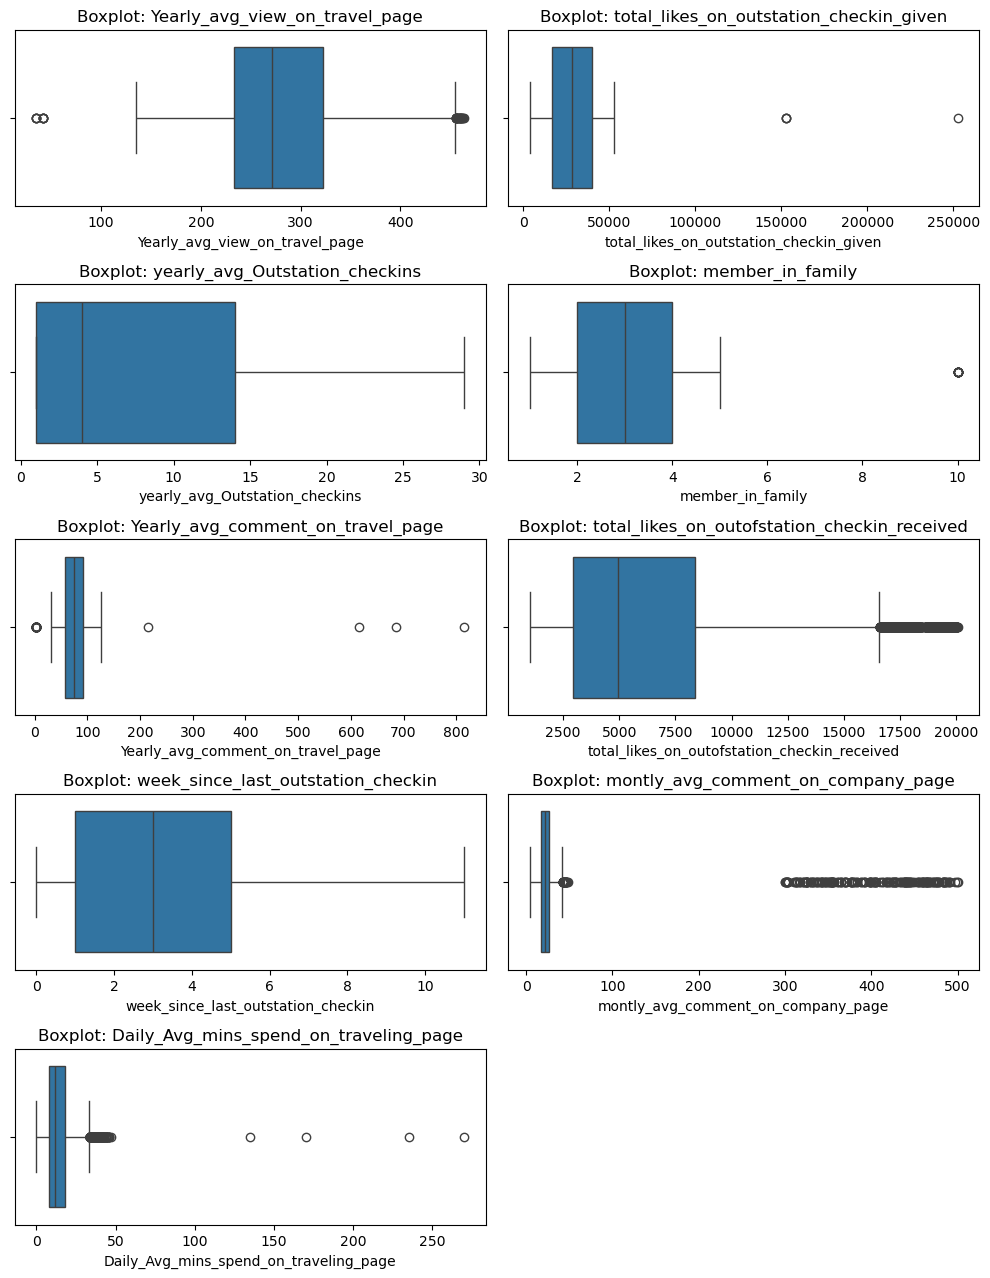

In [60]:
num_cols_obs = df.select_dtypes(include=[np.number]).columns.drop('UserID', errors='ignore')

plt.figure(figsize=(10, 15))
for i, col in enumerate(num_cols_obs, 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
plt.show()

W wielu przypadkach zaobserwowano istotne wartości odstające (ang. outliers), m.in. w zmiennych:
 - total_likes_on_outstation_checkin_given oraz total_likes_on_outofstation_checkin_received – pojawiają się użytkownicy o wyjątkowo wysokim poziomie zaangażowania,
 - Yearly_avg_view_on_travel_page oraz Daily_Avg_mins_spend_on_traveling_page – występują osoby spędzające nietypowo dużo czasu na stronie podróżniczej,
 - montly_avg_comment_on_company_page – mimo przeważająco niskich wartości, pojawia się ogon rozkładu świadczący o wyjątkowo aktywnych użytkownikach.

Zmienna member_in_family oraz week_since_last_outstation_checkin wykazują bardziej zrównoważony rozkład, z ograniczoną liczbą obserwacji odstających.

Obecność wartości odstających nie jest w tym przypadku anomalią — wynika ze specyfiki danych społecznościowych, w których stosunkowo niewielka liczba użytkowników może wykazywać wyjątkowo intensywne wzorce aktywności. Z tego względu nie zdecydowano się na usuwanie outlierów, ponieważ mogą one stanowić istotną wartość predykcyjną. Ich obecność może być ważnym czynnikiem różnicującym użytkowników, np. pod kątem zakupu produktu.

Skośność zmiennych (skewness):
montly_avg_comment_on_company_page              7.684047
Yearly_avg_comment_on_travel_page               4.910947
Daily_Avg_mins_spend_on_traveling_page          4.480710
total_likes_on_outofstation_checkin_received    1.368578
yearly_avg_Outstation_checkins                  0.977806
week_since_last_outstation_checkin              0.915334
total_likes_on_outstation_checkin_given         0.498413
Yearly_avg_view_on_travel_page                  0.446136
member_in_family                                0.001205
dtype: float64


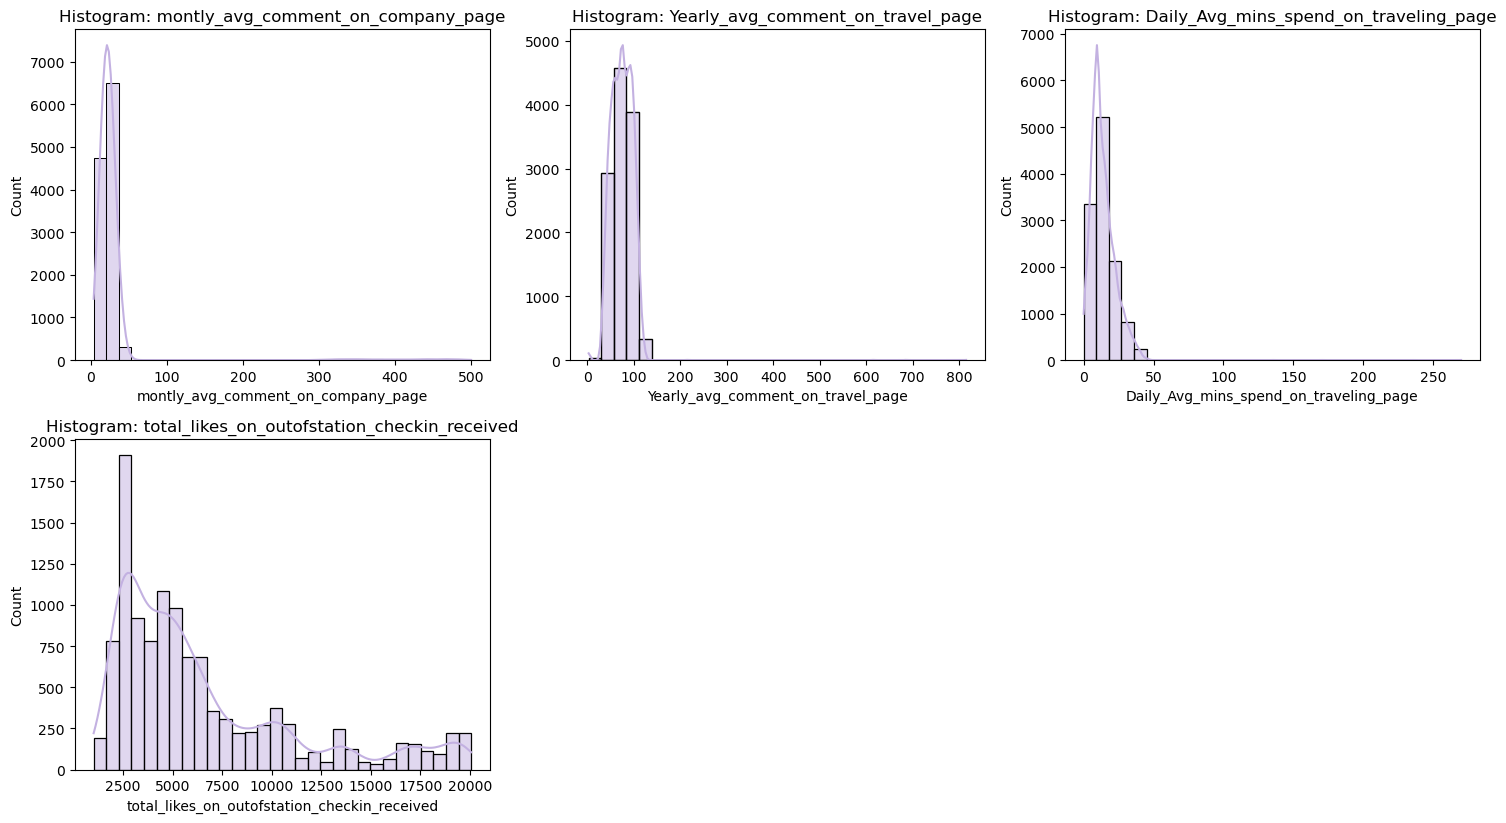

In [63]:
skewness = df[num_cols_obs].skew().sort_values(ascending=False)
print("Skośność zmiennych (skewness):")
print(skewness)

top_skewed = skewness[skewness > 1].index

plt.figure(figsize=(15, 12))
for i, col in enumerate(top_skewed, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="#C3B1E1", alpha=0.5)
    plt.title(f'Histogram: {col}')
    plt.tight_layout()
plt.show()

Kilka zmiennych wykazuje silną prawoskośność (skośność > 1), np. total_likes_on_outstation_checkin_given, Yearly_avg_comment_on_travel_page czy montly_avg_comment_on_company_page. Może to wpływać na dalsze analizy statystyczne lub modele predykcyjne (jeżeli były by budowane).

Na tym etapie nie dokonano transformacji zmiennych (np. logarytmicznej), ponieważ celem analizy jest eksploracja i zrozumienie wzorców, a nie budowa modelu (jednak warto o tym pamiętć).

##### Rzadkie kategorie w zmiennych kategorycznych

In [65]:
threshold = 5  # kategorie poniżej 5 wystąpień uznano za rzadie

for col in df.select_dtypes(include='object').columns:
    counts = df[col].value_counts()
    rare_values = counts[counts < threshold]
    if not rare_values.empty:
        print(f"Rzadkie kategorie w '{col}':")
        print(rare_values)
        print()

Rzadkie kategorie w 'preferred_device':
preferred_device
Other    4
Name: count, dtype: int64

Rzadkie kategorie w 'travelling_network_rating':
travelling_network_rating
10    1
Name: count, dtype: int64



W zmiennych kategorycznych zidentyfikowano dwie rzadkie kategorie (które pojawiają się mniej niż 5 razy) — dla zmiennej „travelling_network_rating” oraz „preferred_device”. 

Zmienna „travelling_network_rating” wskazuje, czy użytkownik ma bliskich przyjaciół, którzy również lubią podróżować — przyjmuje wartości od 1 do 4. Wartość 1 oznacza ocenę najwyższą (czyli użytkownik ma wielu bliskich przyjaciół), natomiast wartość 4 oznacza ocenę najniższą (czyli bardzo mało lub brak takich przyjaciół). Występującą wartość 10 uznano za błędną i zastąpiono ją wartością najwyższą, czyli 4. 

Zidentyfikowaną rzadką kategorię dla zmiennej „preferred_device” pozostawiono bez zmian. Zmienna ta wskazuje preferowane urządzenie, z którego użytkownik najczęściej (lub najchętniej) się loguje. Mimo że dana kategoria występuje tylko w kilku przypadkach, jej pozostawienie jest uzasadnione m.in. z takiego powodu: może mieć wartość biznesową — na przykład wskazywać specyficzne segmenty użytkowników lub nietypowe zachowania, które są istotne dla dalszych analiz. Mimo swojej rzadkości, kategoria ta może być istotna w kontekście przyszłych trendów lub decyzji strategicznych (np. rozwoju usług pod konkretne urządzenia).

In [68]:
df['travelling_network_rating'] = df['travelling_network_rating'].replace(10, 4)

## WIZUALIZACJE

##### Udział użytkowników, którzy zakupią produkt w przyszłym miesiącu („Taken_product”)

Wykres przedstawia rozkład użytkowników, którzy dokonają zakupu biletu w przyszłym miesiący („Yes”), w porównaniu do tych, którzy go nie zakupią („No”). Spośród wszystkich obserwacji, określono, że nieco poniżej 2 000 użytkowników zdecyduje się na zakup, podczas gdy prawie 10 000 pozostanie biernych pod tym względem.

Tak znacząca dysproporcja może świadczyć o stosunkowo niskim poziomie konwersji w serwisie. Potencjalne przyczyny to m.in. niewystarczające dopasowanie oferty do potrzeb użytkowników, brak zaangażowania w czasie przeglądania strony lub ogólny brak zainteresowania prezentowanymi produktami turystycznymi.

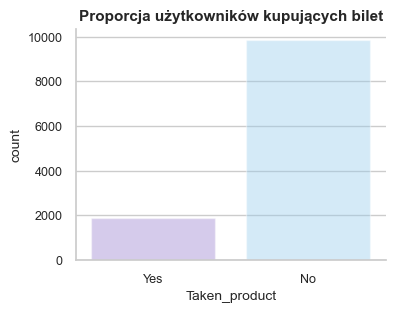

In [72]:
sns.set(style="whitegrid")

plt.figure(figsize=(4, 3))
sns.countplot(
    data=df,
    x='Taken_product',
    hue='Taken_product',
    palette={'Yes': '#9370DB', 'No': '#87CEFA'},
    alpha=0.4,
    legend=False
)

plt.title('Proporcja użytkowników kupujących bilet', weight='bold', fontsize=11)
plt.xlabel('Taken_product', fontsize=10)
plt.ylabel('count', fontsize=10)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.despine()
plt.show()

##### Najpopularniesze lokalizacje

Preferencje dotyczące miejsc podróży są zróżnicowane, jednak wśród użytkowników można zaobserwować szczególne zainteresowanie kilkoma typami lokalizacji. Najczęściej wybierane kategorie to:
 - beach – miejsca wypoczynkowe nad morzem,
 - financial – centra finansowe (prawdopodobnie chodzi o miasta znane z koncentracji instytucji finansowych i biznesowych),
 - historical site – lokalizacje o charakterze historycznym.

Wskazuje to na zróżnicowane motywacje podróżnych – od wypoczynku, przez cele zawodowe, po zwiedzanie zabytków.

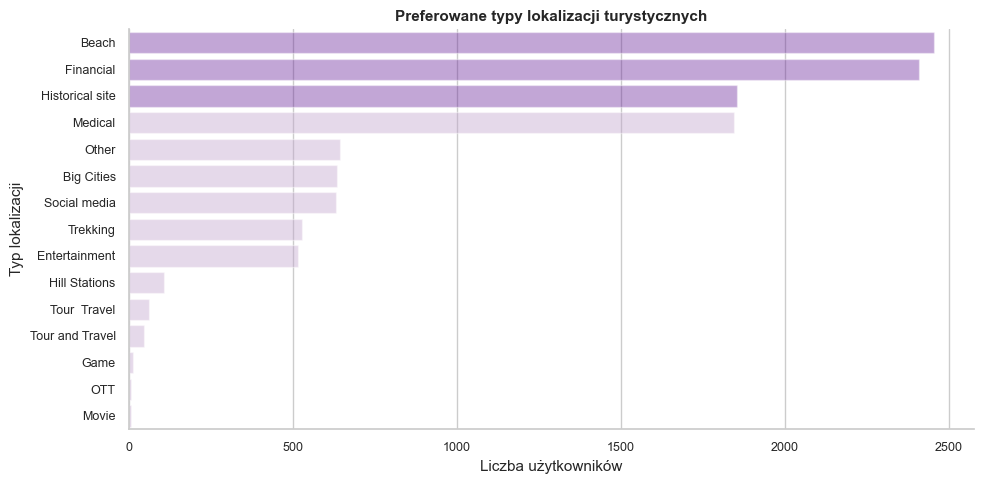

In [76]:
sns.set(style="whitegrid")

# Lista preferencji (uporządkowana według popularności)
ordered = df['preferred_location_type'].value_counts().index

# Przygotowanie kolorów: top 3 ciemniejszy fiolet, reszta jaśniejszy
colors = ['#6a0dad' if i < 3 else '#c39bd3' for i in range(len(ordered))]

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    y='preferred_location_type',
    hue='preferred_location_type',
    order=ordered,
    palette=dict(zip(ordered, colors)), 
    alpha=0.4,
    legend=False 
)

plt.title('Preferowane typy lokalizacji turystycznych', weight='bold', fontsize=11)
plt.xlabel('Liczba użytkowników', fontsize=11)
plt.ylabel('Typ lokalizacji', fontsize=11)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
sns.despine()
plt.tight_layout()
plt.show()

##### Czas spędzony na stronie a zakup biletu

Średni czas spędzany na stronie jest podobny w obu grupach – zarówno wśród osób, które zakupią bilet w rzyszłym miesiący, jak i tych, które tego nie zrobią. Większość użytkowników korzysta z serwisu średnio od 10 do 25 minut dziennie. Zakresy (wysokości pudełek) są zbliżone, co oznacza, że różnice w czasie korzystania z platformy między grupami są niewielkie.

Na wykresie widoczne są pojedyncze punkty powyżej górnych wąsów, wskazujące na wartości odstające, które nie zostały skorygowane. W grupie osób, które zakupią bilet, kilka jednostek spędzało na stronie ponad 100 minut dziennie – w niektórych przypadkach nawet powyżej 150 minut. Wśród osób, które biletu nie zakupią, występują jeszcze bardziej skrajne przypadki – czas spędzony na stronie sięgał nawet ponad 250 minut dziennie.

Tak wysokie wartości mogą wynikać z różnych czynników, takich jak:
 - intensywne planowanie podróży (przeglądanie ofert, czytanie opisów, sprawdzanie lokalizacji),
 - pozostawienie otwartej strony na dłuższy czas bez aktywności,
 - niezdecydowanie użytkowników co do zakupu.

Brak wyraźnych różnic pomiędzy grupami sugeruje, że średni czas spędzony na stronie nie jest silnym predyktorem decyzji o zakupie biletu.

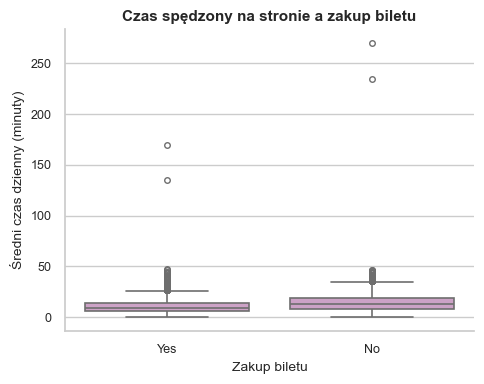

In [80]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 4))
sns.boxplot(
    data=df,
    x='Taken_product',
    y='Daily_Avg_mins_spend_on_traveling_page',
    hue='Taken_product',
    palette={'Yes': '#D39BCB', 'No': '#D39BCB'},
    fliersize=4,  
    linewidth=1.2,
    legend=False 
)

plt.title('Czas spędzony na stronie a zakup biletu', weight='bold', fontsize=11)
plt.xlabel('Zakup biletu', fontsize=10)
plt.ylabel('Średni czas dzienny (minuty)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()

##### Liczba członków rodziny a decyzja o zakupie

Liczba członków rodziny nie różnicuje istotnie decyzji o zakupie biletu – obie grupy mają niemal identyczny rozkład. Z wykresu wynika, że liczba członków rodziny wśród osób, które kupią i nie kupią biletu, jest bardzo podobna. W obu przypadkach mediana wynosi 3 osoby, a większość użytkowników ma od 2 do 4 członków rodziny.

Można zatem wnioskować, że sama wielkość rodziny nie wpływa bezpośrednio na decyzję zakupową. Prawdopodobnie większe znaczenie mają inne czynniki, takie jak dochód, zainteresowanie podróżą czy dostępność terminów. W przyszłości warto byłoby rozszerzyć zestaw danych o takie zmienne, by lepiej zrozumieć mechanizmy podejmowania decyzji.

Wartości odstające są nieliczne, lecz mogą wskazywać na specyficzne przypadki – np. osoby planujące wyjazdy w większym gronie, takie jak wielodzietne rodziny lub grupy zorganizowane.

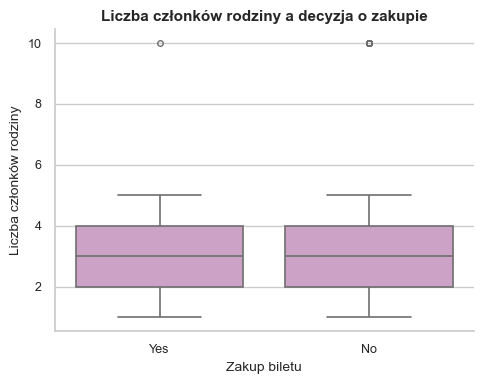

In [84]:
sns.set(style="whitegrid")

plt.figure(figsize=(5, 4))

sns.boxplot(
    data=df,
    x='Taken_product',
    y='member_in_family',
    hue='Taken_product',
    palette={'Yes': '#D39BCB', 'No': '#D39BCB'},
    fliersize=4,
    linewidth=1.2,
    legend=False
)

plt.title('Liczba członków rodziny a decyzja o zakupie', weight='bold', fontsize=11)
plt.xlabel('Zakup biletu', fontsize=10)
plt.ylabel('Liczba członków rodziny', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()


##### Czas spędzony na stronie a liczba komentarzy - uwzględnienie sieci znajomych

Wykres przedstawia zależność pomiędzy średnim czasem spędzonym na stronie a średnią liczbą komentarzy, z uwzględnieniem oceny sieci znajomych użytkownika. Większość użytkowników skupia się w zakresie do 50 minut dziennego czasu na stronie i do 150 komentarzy w ciągu roku, co wskazuje na umiarkowany poziom aktywności. Występują jednak pojedyncze przypadki użytkowników znacząco odbiegających od ogółu – niektórzy spędzają na stronie ponad 100 minut dziennie lub publikują nawet ponad 600 komentarzy w ciągu roku. Takie wartości odstające mogą wynikać z obecności bardzo zaangażowanych użytkowników (np. organizatorów, moderatorów), błędów pomiarowych lub aktywności botów.

Kolorystyka punktów odzwierciedla ocenę sieci znajomych w skali od 1 do 4. Można zaobserwować, że użytkownicy z wyższą oceną (kolory bliższe żółtemu) często są bardziej aktywni w komentarzach, choć nie jest to zależność jednoznaczna. Wśród aktywnych użytkowników pojawiają się również osoby z niższymi ocenami (fioletowe punkty), co sugeruje, że ocena społeczna może wpływać na zaangażowanie, ale nie jest jego głównym czynnikiem determinującym.

Podsumowując, dane sugerują dużą koncentrację umiarkowanych użytkowników, przy jednoczesnym istnieniu skrajnie aktywnych jednostek. Warto w przyszłej analizie sprawdzić, czy wysoka ocena sieci znajomych koreluje z innymi formami zaangażowania, co może być przydatne np. przy projektowaniu funkcji społecznościowych serwisu.

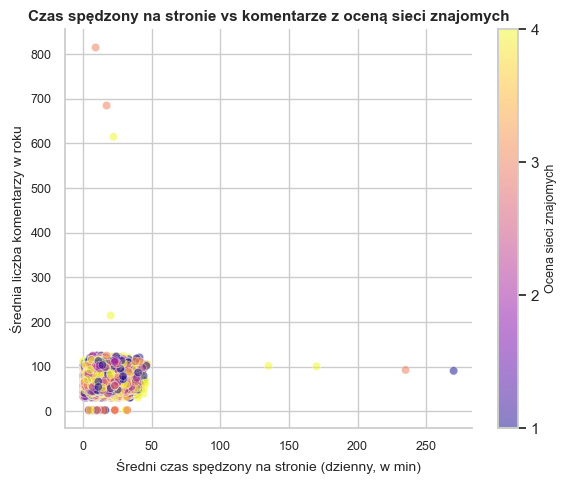

In [87]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 5))

scatter = plt.scatter(
    df['Daily_Avg_mins_spend_on_traveling_page'],
    df['Yearly_avg_comment_on_travel_page'],
    c=df['travelling_network_rating'],
    cmap='plasma',
    alpha=0.5,
    edgecolors='w',
    linewidths=0.5
)

cbar = plt.colorbar(scatter)
cbar.set_label('Ocena sieci znajomych', fontsize=9)

# Ustawienie skali kolorbar na kroki co 1
cbar.set_ticks(range(int(df['travelling_network_rating'].min()), 
                     int(df['travelling_network_rating'].max()) + 1))

plt.xlabel('Średni czas spędzony na stronie (dzienny, w min)', fontsize=10)
plt.ylabel('Średnia liczba komentarzy w roku', fontsize=10)
plt.title('Czas spędzony na stronie vs komentarze z oceną sieci znajomych',
          fontsize=11, weight='bold')

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

sns.despine()
plt.tight_layout()
plt.show()


## ANALIZA OPISOWA

Skupiono się na odpowiedzi na pytanie: Czy istnieje związek między poziomem zaangażowania użytkownika na stronie firmy a prawdopodobieństwem zakupu biletu w najbliższym miesiącu? 

W pierwszej kolejności porównano średnie wartości zaangażowania (m.in. czas na stronie, komentarze) między użytkownikami, którzy kupili bilet (Taken_product = 1), a tymi, którzy nie kupili (Taken_product = 0).

Przyjęto, że zmienne reprezentujące zaangażowanie na stronie to:
 - Daily_Avg_mins_spend_on_traveling_page,
 - montly_avg_comment_on_company_page,
 - following_company_page (zbinaryzowana jako 1/0).

Na podstawie wykonanej statystyki opisowej oraz wykresów można powiedzieć, że:
1. Daily Avg Mins Spend on Traveling Page: 

Użytkownicy, którzy nie kupili produktu, spędzali średnio ok 15 minut (14,39) dziennie na stronie podróżniczej, podczas gdy osoby, które dokonały zakupu, spędzały średnio ok 11 minut (10,85). Różnica sugeruje, że wyższe zaangażowanie czasowe niekoniecznie przekłada się na zakup, a wręcz może wskazywać na użytkowników bardziej przeglądających niż decyzyjnych. Wykres pudełkowy potwierdza tę tendencję – mediana czasu jest niższa wśród kupujących.

2. Monthly Avg Comment on Company Page:

Średnia liczba miesięcznych komentarzy jest bardzo zbliżona w obu grupach: ok. 29 komenarzy - dla nie kupujących dokładnie 28,65 komentarza vs. 28,73 komentarza w grupie kupujących. Brak wyraźnej różnicy sugeruje, że liczba komentarzy na stronie firmy nie różnicuje istotnie grupy kupujących i niekupujących.

3. Is Following Company Page: 

Wyraźne różnice widać w przypadku obserwowania strony firmy - wśród osób, które dokonały zakupu, aż 53,1% obserwuje stronę firmy, podczas gdy wśród osób, które nie dokonały zakupu, tylko 23,2% ją obserwuje. To może sugerować, że obserwowanie profilu firmy jest związane z większym prawdopodobieństwem zakupu – być może z powodu większego zaufania, zainteresowania lub kontaktu z treściami marketingowymi.

In [91]:
df['is_following_company_page'] = df['following_company_page'].astype(int)

engagement_vars = [
    'Daily_Avg_mins_spend_on_traveling_page',
    'montly_avg_comment_on_company_page',
    'is_following_company_page'
]

pd.set_option('display.max_columns', None)
desc_table = df.groupby('Taken_product')[engagement_vars].describe()
desc_table

Daily_Avg_mins_spend_on_traveling_page                       \
                                               count       mean       std   
Taken_product                                                               
No                                            9864.0  14.387165  8.966589   
Yes                                           1896.0  10.854430  9.033851   

                                           montly_avg_comment_on_company_page  \
               min  25%   50%   75%    max                              count   
Taken_product                                                                   
No             0.0  8.0  13.0  19.0  270.0                             9864.0   
Yes            0.0  6.0   9.0  14.0  170.0                             1896.0   

                                                                    \
                    mean        std   min   25%   50%   75%    max   
Taken_product                                                        
No             28.647709  48.611263   4.0  17.0  22.0  27.0  500.0   
Yes            28.729430  48.930483  11.0  17.0  22.0  27.0  497.0   

              is_following_company_page                                     \
                                  count      mean       std  min  25%  50%   
Taken_product                                                                
No                               9864.0  0.232259  0.422295  0.0  0.0  0.0   
Yes                              1896.0  0.530591  0.499195  0.0  0.0  1.0   

                         
               75%  max  
Taken_product            
No             0.0  1.0  
Yes            1.0  1.0

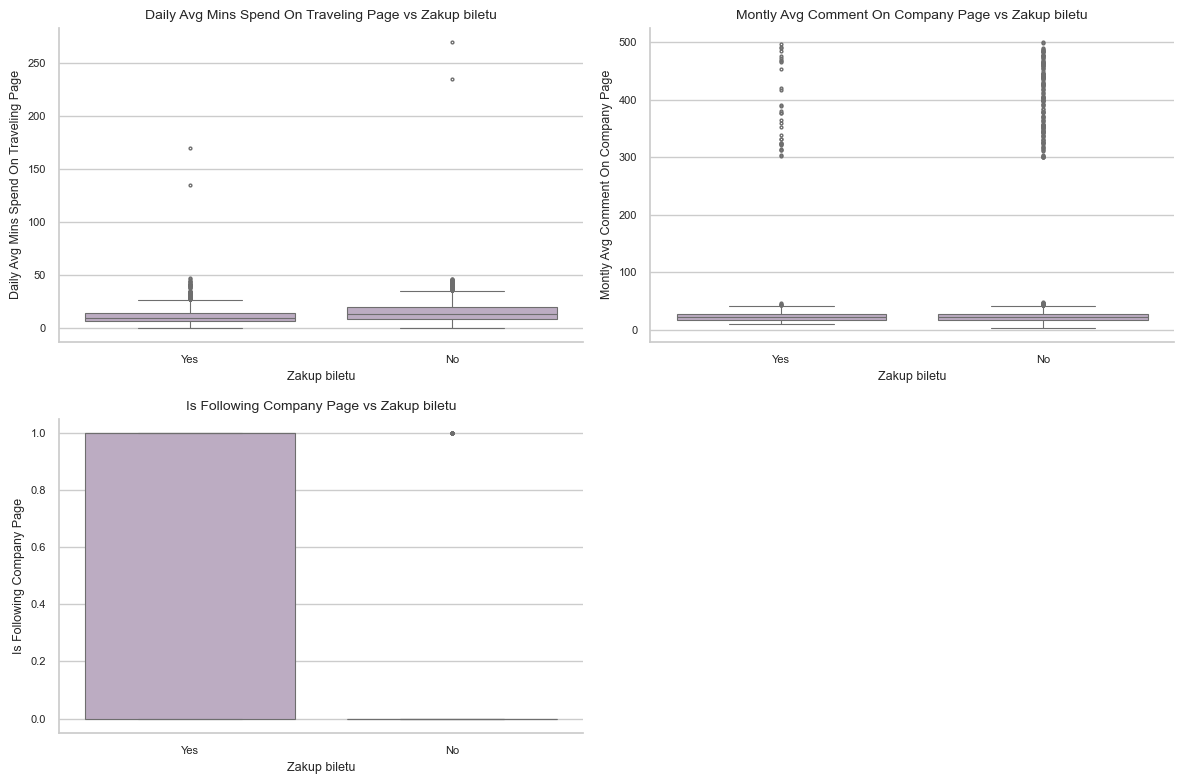

In [93]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(engagement_vars):
    sns.boxplot(
        data=df,
        x='Taken_product',
        y=feature,
        ax=axes[i],
        color='#c39bd3',
        saturation=0.4,
        fliersize=2,
        linewidth=0.8
    )
    
    axes[i].set_title(f'{feature.replace("_", " ").title()} vs Zakup biletu', fontsize=10)
    axes[i].set_xlabel('Zakup biletu', fontsize=9)
    axes[i].set_ylabel(feature.replace("_", " ").title(), fontsize=9)
    axes[i].tick_params(labelsize=8)
    
    sns.despine()

if len(engagement_vars) < len(axes):
    for j in range(len(engagement_vars), len(axes)):
        axes[j].axis('off')

plt.tight_layout()
plt.show()

W celu zbadania zależności pomiędzy zaangażowaniem użytkowników a decyzją o zakupie produktu (Taken_product_bin), przeprowadzono analizę korelacji Pearsona dla wybranych zmiennych liczbowych. Wyniki przedstawiono w formie macierzy korelacyjnej poniżej.

Żadna ze zmiennych zaangażowania nie wykazuje silnej korelacji z decyzją o zakupie produktu (wszystkie wartości współczynnika korelacji znajdują się w przedziale od -0.16 do 0.04).
Najwyższą (choć nadal słabą) negatywną korelację z zakupem biletu zaobserwowano dla zmiennych:
 - total_likes_on_outofstation_checkin_received (r = -0.16),
 - Daily_Avg_mins_spend_on_traveling_page (r = -0.14).

Może to sugerować, że użytkownicy bardziej aktywni społecznie lub ci, którzy częściej odwiedzają stronę podróżniczą, niekoniecznie finalizują zakup produktu.

Zmienne opisujące zaangażowanie użytkowników w platformie (mierzone aktywnością i interakcjami) nie są silnie skorelowane z decyzją zakupową. Oznacza to, że same dane ilościowe dotyczące aktywności użytkownika mogą być niewystarczające do przewidywania zakupu, a ich siłę predykcyjną warto zbadać dopiero w szerszym kontekście — np. jako część modelu predykcyjnego uwzględniającego również zmienne demograficzne lub jakościowe.

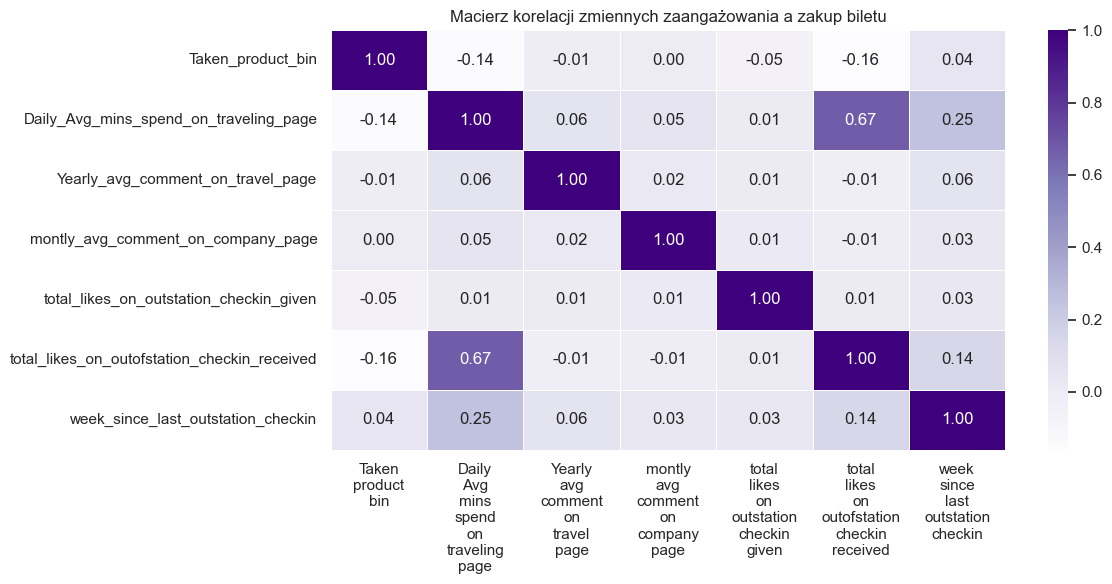

In [96]:
df['Taken_product_bin'] = df['Taken_product'].map({'No': 0, 'Yes': 1})
correlation_vars = [
    'Taken_product_bin',
    'Daily_Avg_mins_spend_on_traveling_page',
    'Yearly_avg_comment_on_travel_page',
    'montly_avg_comment_on_company_page',
    'total_likes_on_outstation_checkin_given',
    'total_likes_on_outofstation_checkin_received',
    'week_since_last_outstation_checkin'
]

corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(12,6))
ax = sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)

# Czytelne etykiety na osiach
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')

plt.title('Macierz korelacji zmiennych zaangażowania a zakup biletu')
plt.tight_layout()
plt.show()

W dalszej części analizy skupiono się na zbadaniu powiązań między zmiennymi jakościowymi, które opisują różne aspekty zachowań i cech użytkowników, takich jak preferencje urządzenia, tryb pracy czy obecność w określonych segmentach (np. osoby dorosłe, osoby śledzące stronę firmy). Zmienne te mają charakter kategoryczny, dlatego tradycyjne metody korelacji (np. współczynnik Pearsona) nie są tutaj odpowiednie.

W celu zbadania siły związku między parami zmiennych kategorycznych zastosowano korelację VCramera. Dzięki temu można ocenić, czy występują istotne relacje między wybranymi zmiennymi jakościowymi, co może być pomocne np. w segmentacji użytkowników lub doborze cech predykcyjnych w dalszym modelowaniu. Otrzymana macierz korelacji została przedstawiona poniżej.

Najsilniejszy związek z decyzją zakupową (Taken_product) wykazują:
 - following_company_page (Cramér’s V = 0.24) – użytkownicy obserwujący stronę firmy częściej zdecydują się na zakup produktu,
 - Adult_flag (Cramér’s V = 0.19) – osoby oznaczone jako dorośli nieco częściej dokonają zakupu.

Chociaż żadna z analizowanych zmiennych nie wykazuje silnej korelacji z zakupem, można zauważyć, że zaangażowanie użytkownika w relację z firmą (np. poprzez obserwację strony) oraz cechy demograficzne (status dorosłości) mogą mieć pewien wpływ na decyzję zakupową. Warto wziąć te czynniki pod uwagę przy dalszym modelowaniu lub segmentacji użytkowników.

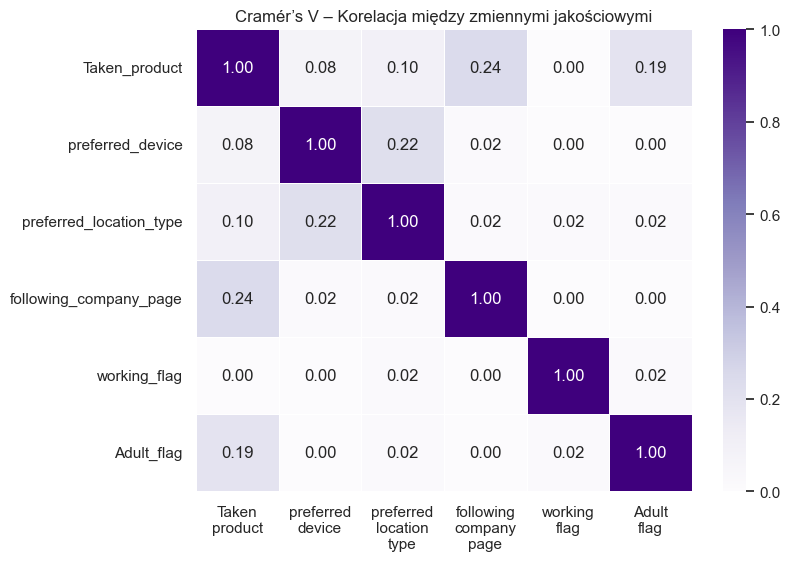

In [99]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Korekta dla niekwadratowych macierzy
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = [
    'Taken_product',
    'preferred_device',
    'preferred_location_type',
    'following_company_page',
    'working_flag',
    'Adult_flag'
]

cramer_matrix = pd.DataFrame(
    np.zeros((len(categorical_vars), len(categorical_vars))),
    index=categorical_vars,
    columns=categorical_vars
)

for var1 in categorical_vars:
    for var2 in categorical_vars:
        cramer_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cramer_matrix, annot=True, cmap='Purples', vmin=0, vmax=1, fmt=".2f", linewidths=0.5)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
plt.title("Cramér’s V – Korelacja między zmiennymi jakościowymi")
plt.show()

## WNIOSKI

Celem projektu była analiza danych użytkowników serwisu turystycznego w kontekście ich zaangażowania oraz decyzji zakupowej dotyczącej produktu turystycznego (Taken_product, kupno biletu w przyszłym miesiącu). Przeprowadzona eksploracja danych pozwoliła na wskazanie zmiennych potencjalnie wpływających na zakup.

W analizie zaobserwowano, że niektóre cechy – takie jak obserwowanie firmowej strony (is_following_company_page), liczba otrzymanych polubień podczas zameldowania (total_likes_on_outofstation_checkin_received) oraz czas spędzany na stronie podróżniczej (Daily_Avg_mins_spend_on_traveling_page) – mogą mieć związek z decyzją zakupową. Zależności te są jednak umiarkowane i nie mają jednoznacznie wysokiej siły korelacji, co sugeruje, że zachowania użytkowników są wieloczynnikowe i trudne do jednoznacznego przewidzenia za pomocą prostych statystyk opisowych.

Ponadto, analiza zmiennych kategorycznych przy użyciu miary VCramera wykazała jedynie słabe do umiarkowanych zależności pomiędzy zmiennymi a zakupem produktu. W wielu zmiennych liczbowych zauważono obecność wartości odstających, co jest typowe dla danych internetowych – część użytkowników wykazuje ponadprzeciętną aktywność. Zdecydowano się ich nie usuwać, uznając te obserwacje za potencjalnie wartościowe.

Na obecnym etapie analiza dostarczyła wartościowych wniosków, jednak dalsze kroki powinny obejmować:
 - budowę modeli predykcyjnych (np. Random Forest, XGBoost, regresja logistyczna), które pozwolą uchwycić bardziej złożone zależności i poprawić trafność prognozy zakupu;
 - inżynierię cech – stworzenie nowych zmiennych i transformację istniejących cech w celu zwiększenia ich użyteczności w modelach;
 - analizę zbalansowania klas - w zmiennej celu występuje duża nierównowaga między klasami;
 - segmentację użytkowników (np. klasteryzacja) – aby lepiej zrozumieć różne grupy zachowań i dostosować ofertę do ich potrzeb.

Analiza pokazała, że decyzja o zakupie produktu turystycznego jest złożona i nie wynika wprost z pojedynczych zmiennych. Użytkownicy bardziej zaangażowani w działania na stronie firmy oraz ci, którzy obserwują jej profil, są bardziej skłonni do zakupu, ale zależności te są umiarkowane. W dalszych etapach niezbędne jest zastosowanie bardziej zaawansowanych metod (np. modeli ML), aby zbudować skuteczne narzędzie predykcyjne.